In [1]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic binary classification data
def generate_data(n_samples=1000):
    np.random.seed(1)
    X = np.random.randn(n_samples, 2)
    y = (X[:, 0] * X[:, 1] > 0).astype(int)  # non-linear boundary
    return X, y.reshape(-1, 1)

In [4]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
# Loss with L2 regularization
def compute_loss(y, y_hat, weights, l2_lambda):
    m = y.shape[0]
    cross_entropy = -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))
    l2_penalty = (l2_lambda / (2 * m)) * np.sum(weights**2)
    return cross_entropy + l2_penalty

In [6]:
# Gradient of loss
def compute_gradients(X, y, y_hat, weights, l2_lambda):
    m = y.shape[0]
    dw = (1/m) * (X.T @ (y_hat - y)) + (l2_lambda / m) * weights
    db = (1/m) * np.sum(y_hat - y)
    return dw, db

In [7]:
# Optimizer implementations
class Optimizer:
    def __init__(self, lr=0.01):
        self.lr = lr

    def step(self, w, dw, b, db):
        raise NotImplementedError

In [8]:
class SGD(Optimizer):
    def step(self, w, dw, b, db):
        return w - self.lr * dw, b - self.lr * db

In [9]:
class Momentum(Optimizer):
    def __init__(self, lr=0.01, beta=0.9):
        super().__init__(lr)
        self.vw = 0
        self.vb = 0
        self.beta = beta

    def step(self, w, dw, b, db):
        self.vw = self.beta * self.vw + (1 - self.beta) * dw
        self.vb = self.beta * self.vb + (1 - self.beta) * db
        return w - self.lr * self.vw, b - self.lr * self.vb

In [10]:
class RMSProp(Optimizer):
    def __init__(self, lr=0.01, beta=0.9, epsilon=1e-8):
        super().__init__(lr)
        self.sw = 0
        self.sb = 0
        self.beta = beta
        self.epsilon = epsilon

    def step(self, w, dw, b, db):
        self.sw = self.beta * self.sw + (1 - self.beta) * (dw**2)
        self.sb = self.beta * self.sb + (1 - self.beta) * (db**2)
        w_update = self.lr * dw / (np.sqrt(self.sw) + self.epsilon)
        b_update = self.lr * db / (np.sqrt(self.sb) + self.epsilon)
        return w - w_update, b - b_update

In [11]:
class Adam(Optimizer):
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        super().__init__(lr)
        self.mw = 0
        self.vw = 0
        self.mb = 0
        self.vb = 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 0

    def step(self, w, dw, b, db):
        self.t += 1
        self.mw = self.beta1 * self.mw + (1 - self.beta1) * dw
        self.vw = self.beta2 * self.vw + (1 - self.beta2) * (dw**2)
        mw_corr = self.mw / (1 - self.beta1**self.t)
        vw_corr = self.vw / (1 - self.beta2**self.t)

        self.mb = self.beta1 * self.mb + (1 - self.beta1) * db
        self.vb = self.beta2 * self.vb + (1 - self.beta2) * (db**2)
        mb_corr = self.mb / (1 - self.beta1**self.t)
        vb_corr = self.vb / (1 - self.beta2**self.t)

        w_update = self.lr * mw_corr / (np.sqrt(vw_corr) + self.epsilon)
        b_update = self.lr * mb_corr / (np.sqrt(vb_corr) + self.epsilon)

        return w - w_update, b - b_update

In [12]:
# Train the model
def train(X, y, optimizer, epochs=100, l2_lambda=0.1):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    b = 0
    loss_history = []

    for epoch in range(epochs):
        z = X @ w + b
        y_hat = sigmoid(z)
        loss = compute_loss(y, y_hat, w, l2_lambda)
        dw, db = compute_gradients(X, y, y_hat, w, l2_lambda)
        w, b = optimizer.step(w, dw, b, db)
        loss_history.append(loss)

    return loss_history

In [13]:
# Run comparison
X, y = generate_data()
optimizers = {
    "SGD": SGD(lr=0.1),
    "Momentum": Momentum(lr=0.1),
    "RMSProp": RMSProp(lr=0.01),
    "Adam": Adam(lr=0.01)
}

In [14]:

results = {}
for name, opt in optimizers.items():
    print(f"Training with {name}...")
    losses = train(X, y, optimizer=opt, epochs=100, l2_lambda=0.1)
    results[name] = losses


Training with SGD...
Training with Momentum...
Training with RMSProp...
Training with Adam...


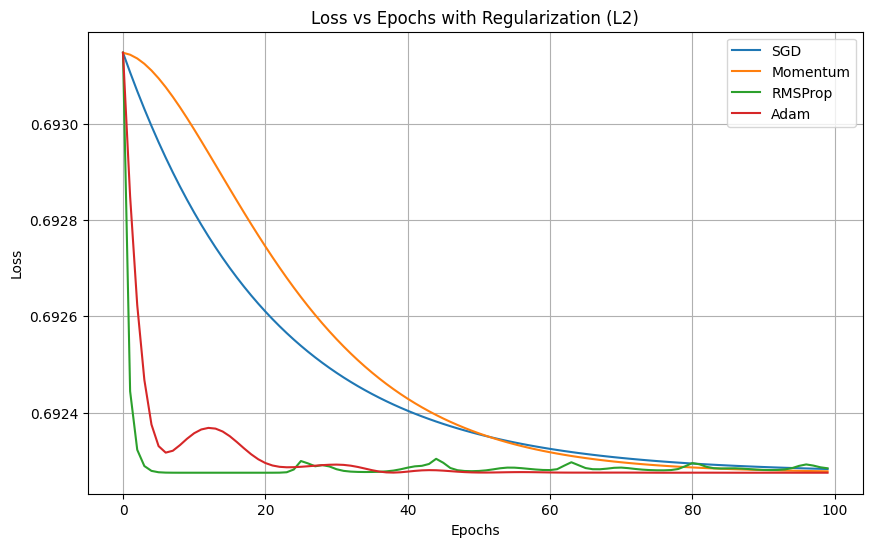

In [15]:
# Plot losses
plt.figure(figsize=(10, 6))
for name, loss in results.items():
    plt.plot(loss, label=name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs with Regularization (L2)')
plt.legend()
plt.grid()
plt.show()